In [1]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from train_GMM import *

/home/vladimir/.local/share/virtualenvs/GMM-EM_LiebLiniger-CJETMew8/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
np.all(np.array([[True, True, False],[False, True, True]]), axis=0)

array([False,  True, False])

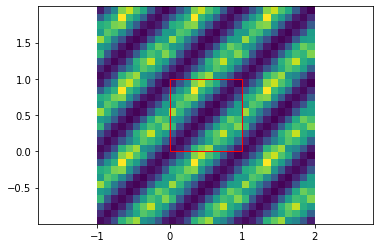

In [2]:
fit_GMM("particle_positions_N=2_metro_steps=10000000.npz", 100, 10000, L=1, verbose=True)

In [3]:
data = np.load("particle_positions_N=2_metro_steps=10000000.npz")

In [4]:
data = data.T
np.random.shuffle(data)

In [5]:
data.shape

(10000000, 2)

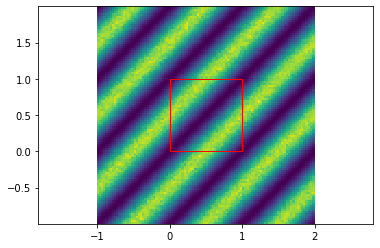

In [6]:
plt.hist2d(data[:, 0], data[:, 1], bins=100);
r = plt.Rectangle((0,0), 1, 1, color='red', fill=False)
ax = plt.gca()
ax.add_patch(r)
plt.axis('equal')
plt.show()

In [7]:
idx = np.where((data[:, 0] >= 0) & (data[:, 0] <= 1)
              & (data[:, 1] >= 0) & (data[:, 1] <= 1))
data_true = data[idx]

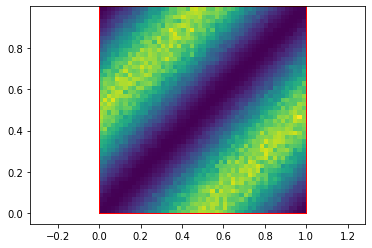

In [8]:
plt.hist2d(data_true[:,0], data_true[:,1], bins=50);
r = plt.Rectangle((0,0), 1, 1, color='red', fill=False)
ax = plt.gca()
ax.add_patch(r)
plt.axis('equal')
plt.show()

In [9]:
gmm = GaussianMixture(n_components=10, covariance_type='full', max_iter=1000, random_state=0)

In [10]:
gmm.fit(data[:10000])

GaussianMixture(max_iter=1000, n_components=10, random_state=0)

In [11]:
X = gmm.sample(10000000)

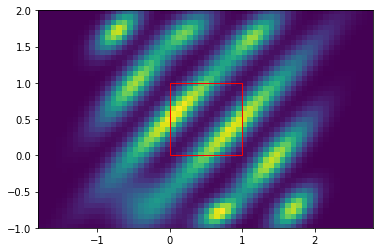

In [12]:
plt.hist2d(X[0][:,0], X[0][:,1], bins=100);
r = plt.Rectangle((0,0), 1, 1, color='red', fill=False)
ax = plt.gca()
ax.add_patch(r)
plt.axis('equal')
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.show()

In [13]:
data_sample = X[0]
idx = np.where((data_sample[:, 0] >= 0) & (data_sample[:, 0] <= 1)
              & (data_sample[:, 1] >= 0) & (data_sample[:, 1] <= 1))
data_sample = data_sample[idx]

In [22]:
#IQR 
IQR = np.quantile(data_true.flatten(), 0.75) - np.quantile(data_true.flatten(), 0.25)
print(IQR)
h = 2 * IQR / data_true.shape[0]**(1/3)
bw = (data_true.max() - data_true.min())/h
print(bw)

np.sqrt(2*(data_true.shape[0])**(1/3))

0.49955281483766556
103.69629747464728


14.394696538807077

In [36]:
data_true.shape[0]

1112052

In [206]:
data_true.shape

(1112052, 2)

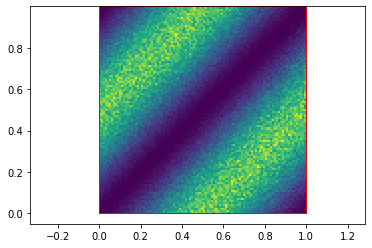

In [24]:
plt.hist2d(data_true[:,0], data_true[:,1], bins=103, density=True);
r = plt.Rectangle((0,0), 1, 1, color='red', fill=False)
ax = plt.gca()
ax.add_patch(r)
plt.axis('equal')
plt.show()

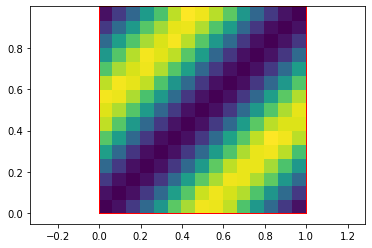

In [216]:
plt.hist2d(data_true[:,0], data_true[:,1], bins=15, density=True);
r = plt.Rectangle((0,0), 1, 1, color='red', fill=False)
ax = plt.gca()
ax.add_patch(r)
plt.axis('equal')
plt.show()

In [31]:
hist1 = np.histogram2d(*data_true.T, bins=15, density=True)
hist2 = np.histogram2d(*data_sample.T, bins=15, density=True)

In [28]:
hist1 = np.histogramdd(data_true, bins=15, density=True)

In [32]:
hist1[0]

array([[0.01537703, 0.10237868, 0.34598327, 0.69641779, 1.14134013,
        1.49683289, 1.83391366, 1.92577121, 1.98788634, 1.82683214,
        1.47437432, 1.08387859, 0.70532028, 0.34335299, 0.09286919],
       [0.10298566, 0.01436539, 0.09893908, 0.34679259, 0.69540614,
        1.12535611, 1.49561891, 1.77584513, 1.96603476, 1.99233758,
        1.7598611 , 1.49096533, 1.13122366, 0.71482976, 0.36237195],
       [0.35023219, 0.09833209, 0.01881663, 0.0942855 , 0.32372704,
        0.69176421, 1.09439971, 1.48813272, 1.78211734, 1.94924142,
        1.90533594, 1.80133863, 1.47579063, 1.09399506, 0.67841047],
       [0.69277586, 0.34557861, 0.09570181, 0.01436539, 0.08963192,
        0.33950873, 0.69135955, 1.10249289, 1.44786917, 1.83735326,
        1.9793885 , 1.99092128, 1.7667403 , 1.49743988, 1.11139538],
       [1.06870388, 0.6923712 , 0.33020158, 0.10217635, 0.01537703,
        0.08801329, 0.34861355, 0.67820814, 1.09581602, 1.46081825,
        1.78960353, 1.93386439, 1.91039418, 

In [213]:
sp.special.kl_div(hist1[0]+1e-5, hist2[0]+1e-5).sum()

4.219138807840727

In [214]:
sp.stats.entropy(hist1[0].flatten()+1e-5, hist2[0].flatten()+1e-5)

0.018751472866459465

In [224]:
x = np.linspace(-5, 5, 100)

In [225]:
unipdf = sp.stats.uniform.pdf(x, loc=-5, scale=10)
uninorm = sp.stats.norm.pdf(x)

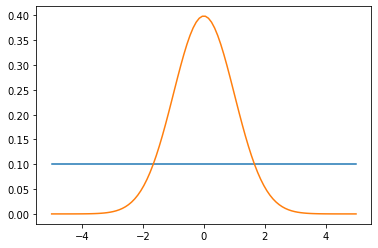

In [226]:
plt.plot(x, unipdf)
plt.plot(x, uninorm)

In [228]:
sp.stats.entropy(unipdf, uninorm)

2.857144419475532

In [77]:
data_true.shape

(111497, 2)

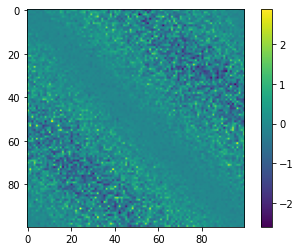

In [90]:
plt.imshow((hist1[0] - hist2[0]))
plt.colorbar()